In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [129]:
df = pd.read_csv("executions/orders.csv")
df

,id,order_id,trader,event,kind,side,price,qty,instrument,sequence,time,execution_time,status
0,e354fd74-8463-467e-a38b-d08d263d91a9,3b6a1b67-95ad-47d5-a755-816d30bcb496,40245,New,Limit,Buy,102.17,1816.0,AAPL,0,2022-10-14T18:56:57.800973Z,19500,Placed
1,b2cd2eb2-5342-41b2-867c-41dbb1041b74,0fc85d56-326b-4cc7-a35d-01f607bb2809,45298,New,Market,Buy,100.00,554.0,AAPL,1,2022-10-14T18:56:57.800984600Z,300,Unfilled
2,283582e4-23bb-45f3-a1a2-8eddf43a5b8c,00f88368-4fc0-4e0e-bdf1-0693b28e9c57,62281,New,Limit,Buy,99.91,110.0,AAPL,2,2022-10-14T18:56:57.800989600Z,26400,Placed
3,772779df-52ad-437a-899f-085b28af61d6,2d080a3b-34d6-4295-ae9a-9ccba5563160,68317,New,Limit,Sell,99.67,3294.0,AAPL,3,2022-10-14T18:56:57.800990600Z,6200,PartiallyFilled
4,e5718d7d-a209-450a-87de-e8e26c018f4f,e6b8e2cb-0feb-461a-8921-37e1881928b8,53571,New,Limit,Sell,101.46,9203.0,AAPL,4,2022-10-14T18:56:57.800991300Z,6800,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,7497331c-b150-4c87-a0af-7ef26b2166cd,052a1700-312e-4455-accf-ea1bb1ae11e0,86792,New,Limit,Buy,100.81,8714.0,AAPL,999995,2022-10-14T18:56:59.636990100Z,2600,PartiallyFilled
999996,d910e4ca-1511-41ed-af51-8ac8cf0d6873,3fe827ae-c644-4712-865a-b468e6e31b92,61895,New,Market,Sell,100.00,1286.0,AAPL,999996,2022-10-14T18:56:59.636990500Z,1300,Filled
999997,58c06e3e-659f-4875-bc1d-de979d326672,4617f737-e2c2-4485-828e-4f7ea73097c7,3898,New,Limit,Sell,100.43,136.0,AAPL,999997,2022-10-14T18:56:59.636990900Z,1900,Filled
999998,da254739-5536-45cb-a03c-9f96ad58b5e6,8ad8ce67-89cb-4e47-b75b-4a72969ffa35,73626,New,Limit,Sell,97.40,9446.0,AAPL,999998,2022-10-14T18:56:59.636991600Z,2500,Filled


# Basic stats

## Order requests

In [130]:
total_prices_requested = len(set(df.price.to_list()))
print("total prices(levels) requested:", total_prices_requested)

total_volume_requested = df.qty.sum()
print("total volume requested:", total_volume_requested)

total prices(levels) requested: 1580
total volume requested: 3946514940.0


## Orderbook events/executions

Total volume per orderbook status (mlns)

status
Canceled              6.370289
Filled             1453.823102
PartiallyFilled     293.733754
Placed             2192.586848
Unfilled              0.000947
Name: qty, dtype: float64

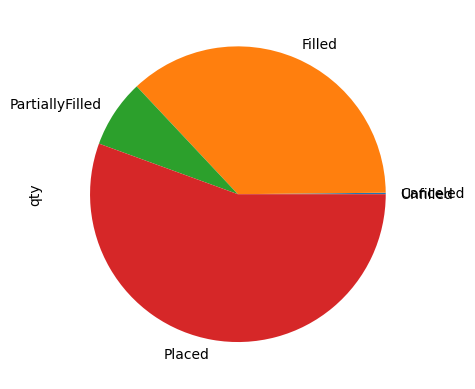

In [131]:
df.groupby("status").qty.sum().plot(kind="pie")
df.groupby("status").qty.sum()/1e6

Total placed levels

In [132]:
len(set(df[df.status=="Placed"].price.to_list()))

1507

# Transactions per second (TPS)

664644 TPS


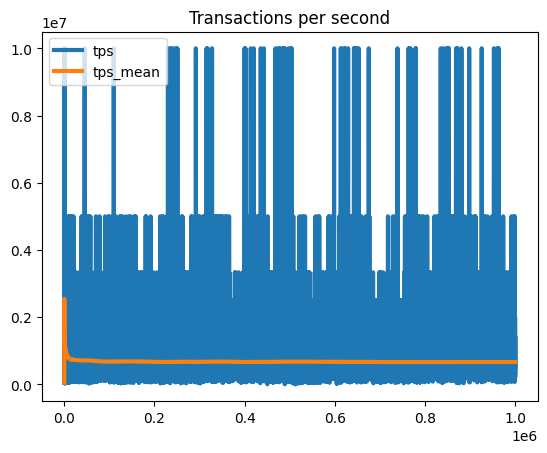

In [142]:
df['tps'] = 1e9 / df.execution_time
df['tps_mean'] = df.tps.expanding().mean()
df[["tps","tps_mean"]].plot(legend=True, linewidth=3, title="Transactions per second")
print(f"{int(df['tps_mean'].iloc[-1])} TPS")

# Distribution of quantities per order kind (Limit, Market)

<AxesSubplot: >

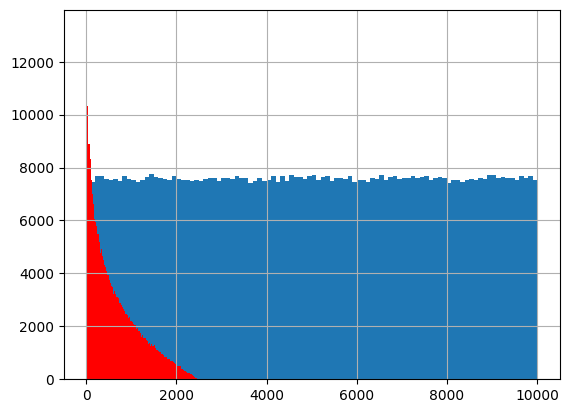

In [134]:
df[df["kind"]=="Limit"].qty.hist(bins=100)
df[df["kind"]=="Market"].qty.hist(bins=100, color="red")

# Average execution time per order request 

<AxesSubplot: xlabel='event'>

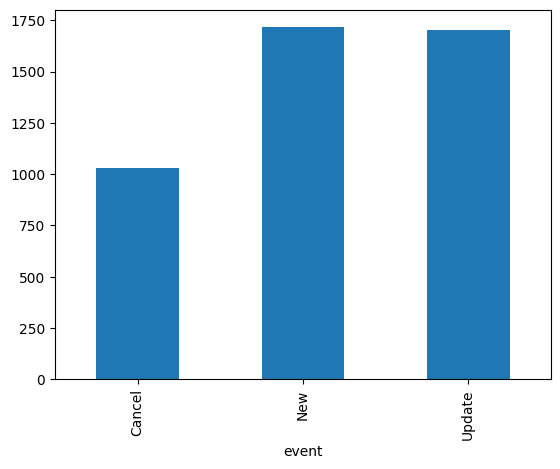

In [135]:
df.groupby(["event"]).execution_time.mean().plot(kind="bar")

# Average execution time per order status

<AxesSubplot: xlabel='status'>

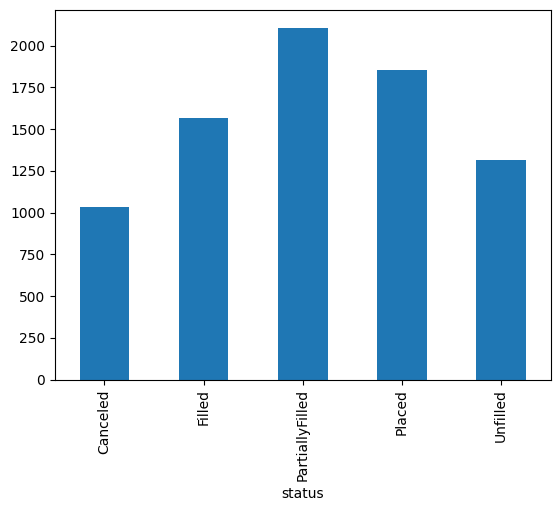

In [136]:
df.groupby(["status"]).execution_time.mean().plot(kind="bar")

# Total occurrences per order status

status
Canceled             1255
Filled             515153
PartiallyFilled     44559
Placed             438207
Unfilled              826
Name: id, dtype: int64

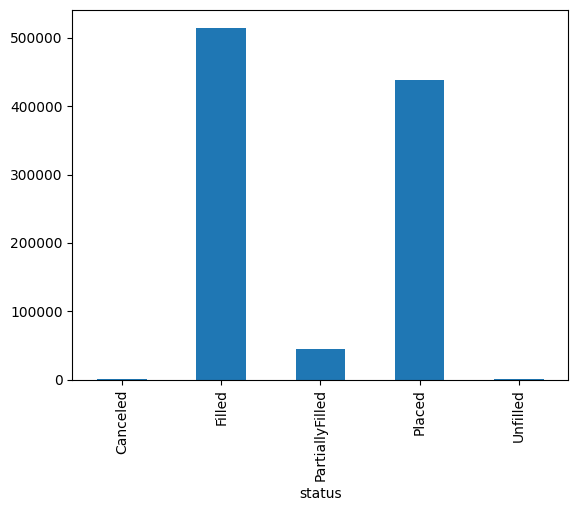

In [137]:
df.groupby(["status"]).id.count().plot(kind="bar")
df.groupby(["status"]).id.count()

# How many orders for each kind (Limit, Market)

kind
Limit     758713
Market    241287
Name: id, dtype: int64

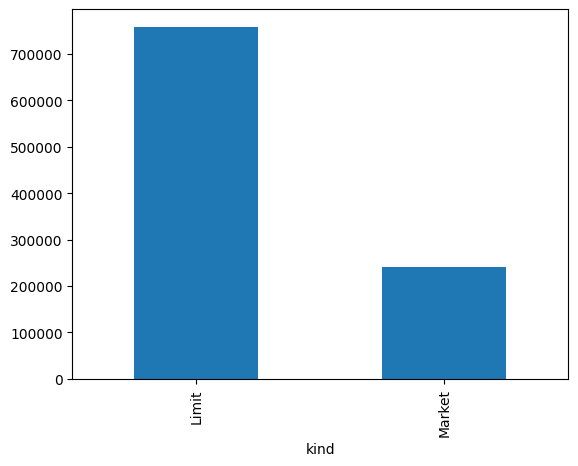

In [138]:
df.groupby(["kind"]).id.count().plot(kind="bar")
df.groupby(["kind"]).id.count()

# Execution times per order

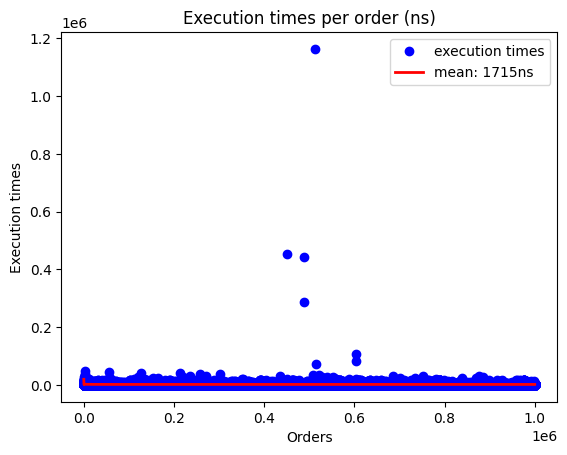

In [144]:
fig, ax = plt.subplots()
plt.xlabel(f'Orders')
plt.ylabel(f'Execution times')
plt.title(f'Execution times per order (ns)')

mean = df['execution_time'].expanding().mean()
ax.plot(df["execution_time"], 'o', c='b', label="execution times")
ax.plot(mean, 'r', linewidth=2, label=f"mean: {int(mean.iloc[-1])}ns")
ax.legend()
fig.patch.set_facecolor('xkcd:white')
# fig.set_size_inches(20, 10)

# Execution times per filtered orders (<2std)

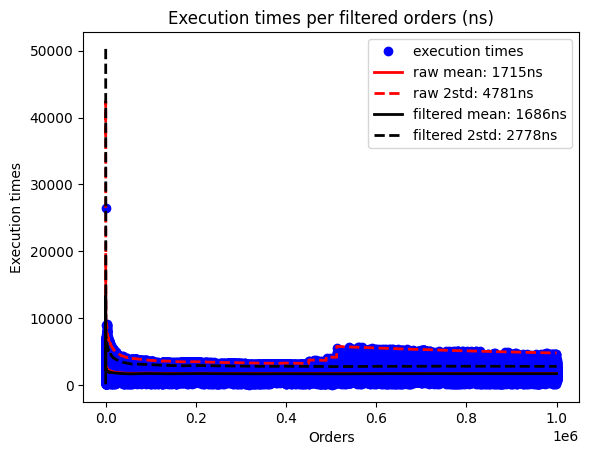

In [145]:
fig, ax = plt.subplots()
plt.xlabel(f'Orders')
plt.ylabel(f'Execution times')
plt.title(f'Execution times per filtered orders (ns)')
std = 2
mean = df['execution_time'].expanding().mean()
outliner_filter = df['execution_time'].expanding().mean() + df['execution_time'].expanding().std()*std
filtered = df[df["execution_time"] < outliner_filter]["execution_time"]
mean_filtered = filtered.expanding().mean()
outliner_filter_filtered = filtered.expanding().mean() + filtered.expanding().std()*std
ax.plot(df[df["execution_time"] < outliner_filter]["execution_time"], 'o', c='b', label="execution times")
ax.plot(mean, 'r', linewidth=2, label=f"raw mean: {int(mean.iloc[-1])}ns")
ax.plot(outliner_filter, 'r--', linewidth=2, label=f"raw 2std: {int(outliner_filter.iloc[-1])}ns")
ax.plot(mean_filtered, 'k', linewidth=2, label=f"filtered mean: {int(mean_filtered.iloc[-1])}ns")
ax.plot(outliner_filter_filtered, 'k--', linewidth=2, label=f"filtered 2std: {int(outliner_filter_filtered.iloc[-1])}ns")
ax.legend()
fig.patch.set_facecolor('xkcd:white')
# fig.set_size_inches(20, 10)

## Number of outliers

In [141]:
outliers = df[df["execution_time"] > outliner_filter].count().id
print(f"{round(outliers/len(df)*100,2)}%")

0.64%
